# Pandas Data Exploration

**Author : Anandakumar Varatharajah**
<br>
***http://www.analyticsinsights.ninja***

***License: MIT License ***

**Change History** [To be removed from final version]
- 20/04/2019:
    * Added graphs to explore numerical columns
    * Added string/object columns unique value exploration table
- 14/04/2019:
    * Used 'transform' function of group_by to include total and %s  
    * Re-arranged referenced and Notes
    * Changed column names
- 13/04/2019: 
    * Updated graphs to next to earch other
    * Included % of Total Memory used column
- 12/04/2019: 
    * Included raw data exploration describe() functions.
    * Updated numeric column formatting for dataframe display
    * Included Game CHanger section and reorganised explanation
- 11/04/2019: 
    * Dynamically creating dataframe for data quality analysis for all sections.
    * Removed HTML based table formation code. Now using data quality analysis dataframe.
    * Included pivottable.js at the end of the notebook but it does not load in Azure Notebooks.
- 10/09/2019: Added HTML tables to display output
- 09/04/2019: Initial version of the notebook

The ***"Pandas Data Exploration Journey"*** series will consist of following notebooks :
1. Pandas Data Exploration - this notebook
2. Data Quality and Transformations Decisions
3. Tidy Data and Data Tranformations (including dataset memory optimisation for big data)
4. Analytics & Visualisations


**Objective**<br>
The main objective of this notebook is only to understand and explore the raw data. The code is largely kept generic so that it could be used with any shape of data. Any data quality or data tidying recommendations or decisions specific to the sample data set are not documented in this notebook to maintain clarity and keep the focus only in data exploration.  
Any data quality or data tidying recommendations or decisions specific to the sample data set will be dealt in follow up notebooks in this series. The reason for seperating these into several notebooks is to maintain clarity and simplicity in each step of the data preparation journey.

# The Game Changer

The game changer for data quaity analysis is the final ***Data Qaulity Dataframe*** that is generated which combines ***all*** the information required to inform data cleaning, tidy data and optimisations (memory and processing) decions.  
Instead of using variuos pandas commands at different instances and going back and forth to cross refer information, Data Quality Dataframe brings all information into a single dataframe. This can then be used to generate data quality related information and plotting to understand data. 

![image.png](DataQualityDataFrame.jpg)

Understanding the data is **the critical step** in preparaing the data to be used for analytics. As many experts will point out the data preparation and tranforming the data into a tidy format takes about 80% of the effort in any data analytics or data anlysis project.<br>
Understanding the data requires good understanding of the domain and/or access to a subject matter expert (SME) to help make decions about data quality and data usage:
* how to interpret each columns and possible values of a column?
* should teh columns be renamed (and cleaned e.g. trim)?
* can any columns be discarded that may not be required for analytics?
* can duplicate columns be dropped?
* can columns with no values (or all empty) be dropped?
* can the missing values be filled and can it be filled meaningfuly?
* can rows that have missing values for certain columns or combination of columns be dropped?
* can columns which have more than certain threshold of blank values be dropped?
    - based on percentage of null values
* can numeric column data types converted / down casted to optimise memory usage based on the data values (or will there be outliers possibly in future data sets that we cannot do this)?
    - use the min and max values to determine the lowest possible data type
* can some columns be converted to Category types?
    - based on count of unique values


# Environment setup

It is recommended best practice to document the execution environment.  
e.g. When the initial version of this notebook was developed in Azure Notebooks (Jupyter) the environment was documented in the code. When the notebook was exported to local PC JupyterLab and then imported back into Azure Notebook, the Kernal changed to an older version and some code did not work. Having the initital versions documented in comments saved a lot of effort in trying to understand what went wrong.

In [57]:
from platform import python_version 
print("Python version in Azure Notebooks as of APril 2019 is : ", python_version()) 
# 3.6.6 in Azure Notebooks in April 2019

Python version in Azure Notebooks as of APril 2019 is :  3.6.6


In [58]:
import pandas as pd
pd.set_option('display.max_columns', 500)

# To check whether a column is numeric type
from pandas.api.types import is_numeric_dtype
# To check whether a column is object/string type
from pandas.api.types import is_string_dtype

# pd.options.display.float_format = '{:,}'.format
# pd.set_option('precision', 2)

# Pandas version   0.22.0 in Azure Notebooks in April 2019
print("Pandas version in Azure Notebooks as of April 2019 is : ", pd.__version__) 

Pandas version in Azure Notebooks as of April 2019 is :  0.22.0


In [59]:
import numpy as np

In [60]:
from IPython.display import display, HTML

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

# Seabotn version   0.9.0 in Azure Notebooks in April 2019
print("Seaborn version in Azure Notebooks as of April 2019 is : ", sns.__version__) 

Seaborn version in Azure Notebooks as of April 2019 is :  0.9.0


In [62]:
#from pivottablejs import pivot_ui

# Raw data file exploration

The raw data file used in this notebook has been derived from the Sales Products csv file from IBM Analytics Community and has been modified to include untidy data for the purposes of this data exploration work.  
The raw data should be in a format that can be laoded into pandas. i.e. if there are any rows need to be skipped,  column headers mapped, etc. should be handle in the pandas.read code block.

In [63]:
raw_data_file = 'Sales_Products_Untidy.csv'
df = pd.read_csv(raw_data_file, thousands=',', float_precision=2)
HTML('<font size =2 color=blue><strong>' + F"The dataset has {df.shape[0] :,} rows X {df.shape[1]} columns" + '</strong></font>')


**Note:** If the raw data is a big data file of several GB's in size it may not be possible to load the the whole file into memory. One possibility is using 'pandas pyspark'.<br>
Other options to load data incrementally and optimise the data by converting data types will be demonstrated in a seperate notebook.

In [64]:
# Sample raw data rows from dataset
df.sample(5).round(2)

,Retailer country,Order method type,Retailer type,Product line,Product line - Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin,Cost,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total Revenue
9957,Canada,Web,Sports Store,Camping Equipment,Camping Equipment-Lanterns,Firefly 4,2012,Q2 2012,4933.35,171,0.38,$3077.9999946135,NaN,NaN,NaN,1233.34,1430.67,2269.34,NaN,NaN,NaN,NaN,NaN,NaN,4933.35
68728,Brazil,Web,Department Store,Camping Equipment,Camping Equipment-Lanterns,Firefly 2,2014,Q1 2014,10345.86,378,0.39,$6301.2600443772,4138.34,1613.95,4593.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gf
959,Canada,E-mail,Department Store,Personal Accessories,Personal Accessories-Navigation,Glacier GPS,2012,Q1 2012,25347.63,231,0.28,$18145.0499867637,7604.29,6919.90,10823.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25347.63
43924,Mexico,Web,Outdoors Shop,Mountaineering Equipment,Mountaineering Equipment-Safety,Granite Climbing Helmet,2013,Q2 2013,81618.30,1161,0.25,$60998.939914086,NaN,NaN,NaN,31014.95,29382.59,21220.76,NaN,NaN,NaN,NaN,NaN,NaN,81618.3
79821,Denmark,Web,Golf Shop,Personal Accessories,Personal Accessories-Watches,Sam,2014,Q2 2014,22420.20,474,0.40,$13391.300050854,NaN,NaN,NaN,7847.07,7847.07,6726.06,NaN,NaN,NaN,NaN,NaN,NaN,22420.2


# Memory usage analysis

### Raw data file size on disk

In [65]:
# Calculate file size in disk (MB)
import os
file_size = (
    os.stat(raw_data_file).st_size 
    / 1024 **2
)

print(F'The raw data file size in disk is {file_size :.2f} MB.')

The raw data file size in disk is 15.73 MB.


### Raw data set size in memory

In [66]:
# Calculate dataset size in memory (MB)
df_mem = df.memory_usage(deep=True).sum() / 1024**2

print(F'The data set memory usage is {df_mem :.2f} MB.')

The data set memory usage is 62.90 MB.


### Raw data set size increase in memory

In [67]:
# Calclulate dataset size increase in memory (MB)
sz_increase = ((df_mem - file_size) / file_size)

print(F'The raw dataset size increase in memory comapred to file size on disk is {sz_increase :.2%}')

The raw dataset size increase in memory comapred to file size on disk is 299.76%


File size on disk,Dataset size in memory,% increase of size in memeory
15.73 MB,62.90 MB,299.76%


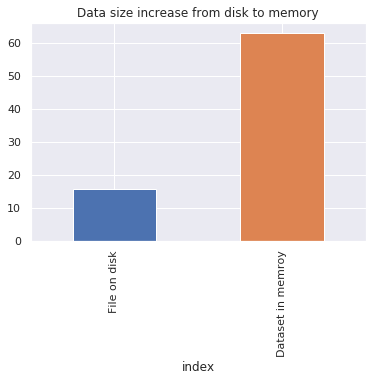

In [68]:
# Create a dictionary from the variables and convert to Pandas DataFrame
# to use DataFrame's ploting capabilities
raw_plot_data = {"File on disk":file_size, "Dataset in memroy": df_mem}
raw_data_plot = pd.DataFrame.from_dict(raw_plot_data, orient='index').reset_index()

# Pandas DataFrame plot
raw_data_plot.plot(kind='bar',x="index" ,y=0, legend=False, title='Data size increase from disk to memory')

plot_html = '<table>'
plot_html = (plot_html +
              '<tr>'
              '<td><strong>File size on disk</strong></td>'
              '<td><strong>Dataset size in memory</strong></td>'
              '<td><strong>% increase of size in memeory</strong></td>'
              '</tr>'
              '<tr>'
              F'<td>{file_size :.2f} MB</td>'
              F'<td>{df_mem :.2f} MB</strong></td>'
              F'<td><font size="2" color="red"><strong>{sz_increase :.2%}<strong></td>'
              '</tr>'
              '</table>'
             )
# Print the final HTML table
HTML(plot_html)

### Memory used by each column in the dataset

In [69]:
mem_used_dtypes = pd.DataFrame(df.memory_usage(deep=True) / 1024**2)
mem_used_dtypes.rename(columns={ 0:'memory'}, inplace=True)


## Raw dataframe stats

In [70]:
# Use describe() to get column stats of raw dataframe
# To merge the stats with Data Quality Dataframe
raw_num_df = df.describe().T

# The Game Changer - Data Quality Dataframe

In [71]:
# Number fo rows for the data quality dataframe will be the count of columns in the raw date dataframe
no_of_rows = len(df.columns)

# Contructing the data_qlt_df dataframe and pre-assigning and columns
# Pre-assigning the number of rows the dataframe would have is memory and priocessing efficient
# This is a better approach than continuos append or concat operation to dataframe
data_qlt_df = (pd.DataFrame(index=np.arange(0, no_of_rows), 
                            columns=('column_name', 'data_type', 'dtype_memory','non_null_values', 
                                     '%_of_non_nulls', 'null_values', '%_of_nulls', 'unique_values_count', 
                                     'column_dtype') 
                           )  #DataFrame end
              ) #outer multi row end

# Add rows to the data_qlt_df dataframe
i = 0
for cols in df.columns:
    data_qlt_df.loc[i] = ([df.columns[i], df[cols].dtype, mem_used_dtypes['memory'][i+1], 
                           df[cols].count(), (df[cols].count()/df.shape[0])*100, 
                           df.shape[0]-df[cols].count(), 100 - (df[cols].count()/df.shape[0])*100, 
                           df[cols].nunique(), df.columns[i]+" - "+str(df[cols].dtype)]
                         )
    i += 1
    # END for cols

    
# using dictionary to convert specific columns 
convert_dict = {'dtype_memory': float, 
                'non_null_values': int,
                '%_of_non_nulls': float, 
                'null_values': int, 
                '%_of_nulls': float, 
                'unique_values_count': int
               } 
# Convert column types and assign to Data Quality Dataframe  
data_qlt_df = data_qlt_df.astype(convert_dict)


In [72]:
# Calculate percentage of each column memory usafe compared to total memory used by raw data datframe
data_qlt_df['%_of_total_memory'] = data_qlt_df['dtype_memory'] / data_qlt_df['dtype_memory'].sum() * 100

# Calculate the total memory used by a given group of data type
# See Notes section at the bottom of this notebook for advatages of using 'transform' function with group_by
data_qlt_df["dtype_total"] = data_qlt_df.groupby('data_type')["dtype_memory"].transform('sum')

# Calculate the percentage memory used by each column data type compared to the total memory used by the group of data type
data_qlt_df["%_of_dtype_mem"] = data_qlt_df["dtype_memory"] / data_qlt_df["dtype_total"] * 100

# the above can be merged to one calculation if we do not need the total as separate column
#data_qlt_df["%_of_dtype_mem2"] = data_qlt_df["Dtype Memory"] / (data_qlt_df.groupby('Data Type')["Dtype Memory"].transform('sum')) * 100

# Calculate the percentage memory used by each group of data type of the total memory used by dataset
data_qlt_df["dtype_%_total_mem"] = data_qlt_df["dtype_total"] / df_mem * 100

# Calculate the count of each data type
data_qlt_df["dtype_count"] = data_qlt_df.groupby('data_type')["data_type"].transform('count')


In [73]:
#----- Key Step ---------------
# Merging the df.describe() output with rest of the info to create a single Data Quaity Dataframe
data_qlt_df = pd.merge(data_qlt_df, raw_num_df, how='left', left_on='column_name', right_index=True)


# Reorder the Data Quality Dataframe columns
data_qlt_df = data_qlt_df[['column_name', 'data_type', 'dtype_memory', 'dtype_count', 'dtype_total', '%_of_dtype_mem', '%_of_total_memory', 'dtype_%_total_mem', 'non_null_values', '%_of_non_nulls', 'null_values', '%_of_nulls', 'unique_values_count', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]


In [74]:
# data_qlt_df.round(2)
# Format the display of decimals for selected numeric columns
col_dict = {'dtype_memory': "{:,.2f}", 'dtype_count': "{:,.2f}", 'dtype_total': "{:,.2f}", '%_of_dtype_mem': "{:,.2f}%", '%_of_total_memory': "{:,.2f}%", 'dtype_%_total_mem':"{:,.2f}%",'non_null_values': "{:,.2f}", '%_of_non_nulls': "{:,.2f}%", 'null_values': "{:,.2f}", '%_of_nulls': "{:,.2f}%", 'unique_values_count': "{:,.2f}", 'count': "{:,.2f}", 'mean': "{:,.2f}", 'std': "{:,.2f}", 'min': "{:,.2f}", 'max': "{:,.2f}", '25%': "{:,.2f}", '50%': "{:,.2f}", '75%': "{:,.2f}"}
data_qlt_df_styler = data_qlt_df.style.format(col_dict)

data_qlt_df_styler

,column_name,data_type,dtype_memory,dtype_count,dtype_total,%_of_dtype_mem,%_of_total_memory,dtype_%_total_mem,non_null_values,%_of_non_nulls,null_values,%_of_nulls,unique_values_count,count,mean,std,min,25%,50%,75%,max
0,Retailer country,object,5.46,9.00,52.10,10.49%,8.69%,82.83%,"88,475.00",100.00%,0.00,0.00%,21.00,nan,nan,nan,nan,nan,nan,nan,nan
1,Order method type,object,5.16,9.00,52.10,9.91%,8.21%,82.83%,"88,475.00",100.00%,0.00,0.00%,7.00,nan,nan,nan,nan,nan,nan,nan,nan
2,Retailer type,object,5.94,9.00,52.10,11.40%,9.44%,82.83%,"88,475.00",100.00%,0.00,0.00%,8.00,nan,nan,nan,nan,nan,nan,nan,nan
3,Product line,object,6.40,9.00,52.10,12.28%,10.17%,82.83%,"88,475.00",100.00%,0.00,0.00%,5.00,nan,nan,nan,nan,nan,nan,nan,nan
4,Product line - Product type,object,7.21,9.00,52.10,13.84%,11.46%,82.83%,"88,475.00",100.00%,0.00,0.00%,21.00,nan,nan,nan,nan,nan,nan,nan,nan
5,Product,object,5.99,9.00,52.10,11.50%,9.52%,82.83%,"88,475.00",100.00%,0.00,0.00%,144.00,nan,nan,nan,nan,nan,nan,nan,nan
6,Year,int64,0.68,2.00,1.35,50.00%,1.07%,2.15%,"88,475.00",100.00%,0.00,0.00%,3.00,"88,475.00","2,012.86",0.78,"2,012.00","2,012.00","2,013.00","2,013.00","2,014.00"
7,Quarter,object,5.40,9.00,52.10,10.37%,8.59%,82.83%,"88,475.00",100.00%,0.00,0.00%,11.00,nan,nan,nan,nan,nan,nan,nan,nan
8,Revenue,float64,0.68,14.00,9.45,7.14%,1.07%,15.02%,"88,475.00",100.00%,0.00,0.00%,"66,943.00","88,475.00","42,638.29","65,784.02",0.00,"8,184.36","21,026.28","50,390.60","1,635,687.96"
9,Quantity,int64,0.68,2.00,1.35,50.00%,1.07%,2.15%,"88,475.00",100.00%,0.00,0.00%,"5,838.00","88,475.00",780.59,"1,541.65",1.00,131.00,333.00,816.00,"67,875.00"


**The above data quality data frame summarises all information required for making data quality decisions.**  
Though there are info() and describe() methods to do these, having all the relvant information in one dataframe makes the data quality exploration much easier. This dataframe can be used for summarising information and for plotting to ehnace the ease of Data Understanding effort.

# Count of columns by data type and memory used

Total memory usage is 62.90 MB.


,dtype_count,dtype_total,dtype_%_total_mem
data_type,,,
int64,2,1.350021,2.146332
object,9,52.098759,82.829224
float64,14,9.450150,15.024323


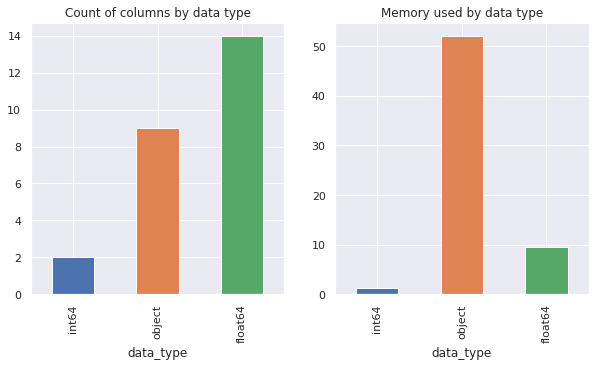

In [75]:
print(F'Total memory usage is {df_mem :.2f} MB.')

plt_dtype = data_qlt_df.groupby('data_type')['dtype_count', 'dtype_total', 'dtype_%_total_mem'].last().sort_values(by='dtype_count')

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(10,5))
plt_dtype.plot(kind='bar', y='dtype_count',  use_index=True, legend=False, ax=ax, title='Count of columns by data type')
plt_dtype.plot(kind='bar', y='dtype_total',  use_index=True, legend=False, ax=ax2, title='Memory used by data type')

# data_qlt_df.plot(kind='bar', use_index=True,  y='Dtype Memory', legend=False, ax=ax2, title='Memory usage (MB) by data type')
plt_dtype

If object (string) data type uses more memory one option is to explore whether there are any possible columns with low cardinality that could be converted to Category data type.  
If int64 or float64 data type uses high memory then it could be explored whether these can be chnaged to low memory data types of similar data type. e.g float64 to floa16

# Candidate columns for Category type

Analysing how many unique values an 'object' column has will be useful to detrmine which columns are good candidates for *Categorical* data type. In combination with the total memory used by 'object' data type and each 'object' data type column, decisions can be made on converting them Category type.

In [76]:
obj_memory = data_qlt_df[data_qlt_df['data_type'] == 'object'].groupby('data_type')['dtype_total'].last()
obj_memory_perc = data_qlt_df[data_qlt_df['data_type'] == 'object'].groupby('data_type')['dtype_%_total_mem'].last()
print(F"Memory used by 'object' data type is {obj_memory[0] :.2f} MB ({obj_memory_perc[0] :.2f}%) of total memory usage of {df_mem :.2f} MB")

# Create a df and a column for % of memory by each object column
cardn_df = data_qlt_df[data_qlt_df['data_type'] == 'object'][['column_name', 'data_type', 'dtype_memory', '%_of_dtype_mem', 'unique_values_count']]

cardn_df.sort_values('unique_values_count')

Memory used by 'object' data type is 52.10 MB (82.83%) of total memory usage of 62.90 MB


,column_name,data_type,dtype_memory,%_of_dtype_mem,unique_values_count
3,Product line,object,6.395268,12.275280,5
1,Order method type,object,5.162388,9.908850,7
2,Retailer type,object,5.939611,11.400677,8
7,Quarter,object,5.400085,10.365094,11
0,Retailer country,object,5.463314,10.486457,21
4,Product line - Product type,object,7.208941,13.837070,21
5,Product,object,5.989807,11.497025,144
11,Cost,object,5.153281,9.891370,55861
24,Total Revenue,object,5.386062,10.338177,66679


Object/string data type columns with low cardinality is suitable for Category type.  
**The threshold of 'low cardinality' depends on the domain of the data and data usage patterns.**

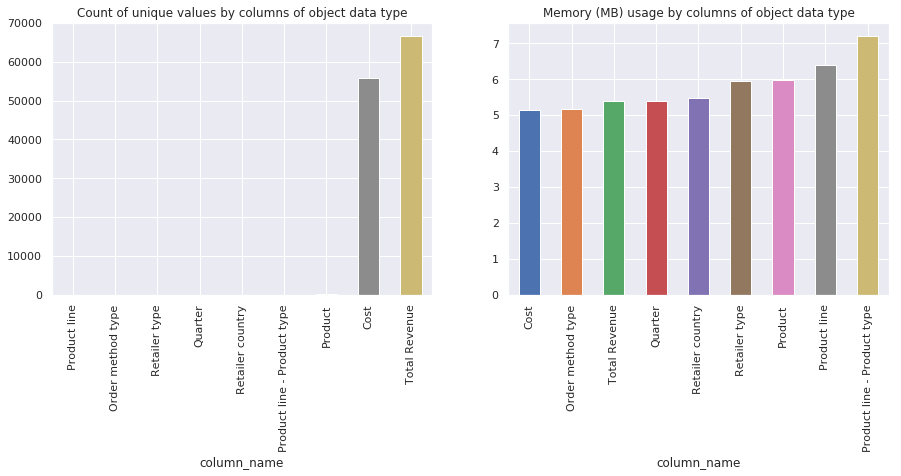

In [77]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))

(data_qlt_df[data_qlt_df['data_type'] == 'object']
 .sort_values(by='unique_values_count')
 .plot(kind="bar", 
       x="column_name", 
       y="unique_values_count", 
       title="Count of unique values by columns of object data type",
      legend=False, ax=ax)
)

(data_qlt_df[data_qlt_df['data_type'] == 'object']
 .sort_values(by='dtype_memory')
 .plot(kind="bar", 
       x="column_name", 
       y="dtype_memory", 
       title="Memory (MB) usage by columns of object data type",
      legend=False, ax=ax2)
)

HTML('<strong>' + F"Memory used by 'object' data type is {obj_memory[0] :.2f} MB ({obj_memory_perc[0] :.2f}%) of total memory usage of {df_mem :.2f} MB" + '</strong>')

# String/Object column unique values analysis

In [78]:
# If the number of unqiue values is above this threshold, the unique values and counts are not dislayed
values_freq_threshold = 25


cardn_html = '<table width="100%" align="left">'
cardn_html = (cardn_html + '<tr><td colspan="3" align="left"><font size="5" color="green">Unique values and frequencies normalised</font></td></tr>')

# In "Candidate columns for Category type" section, the 'cardn_df' dataframe contains 
# all 'objkect' type columns from 'data_qlt_df'
for cn in cardn_df.sort_values('unique_values_count')['column_name']:

    cardn_html = (cardn_html +
            '<td>' 
            '<tr ]>'
            F'<td > <font size="3" color="blue"><strong>{cn}</strong></font></td>'
            F'<td><strong>Unique Values Count : {df[cn].nunique()}</strong></td>'
            F'<td><strong>Non-Nulls Count  :  {df[cn].count()}</strong></td>'
            '</tr>')
 
    # If unique values count is below the threshold value then display the details of unique values
    if df[cn].nunique() <= values_freq_threshold:
        cardn_html = (cardn_html + 
        '<tr>'
        F'<td colspan="3" align="justify">{df[cn].value_counts(normalize=True, sort=True)}</td>'
        '</tr>'   )
    else:
        cardn_html = (cardn_html + 
        '<tr>'
        F'<td colspan="3" align="justify">Too many unique values and frequency. Exceeds specified threshold of {values_freq_threshold}</td>'
        '</tr>'   )
        

    cardn_html = (cardn_html + '</td>')


cardn_html = (cardn_html + '</table>')
    
HTML(cardn_html)

# Analyse numeric columns to downcast

In [79]:
# data_qlt_df.describe().style.format(col_dict)
data_qlt_df[['dtype_memory','non_null_values', '%_of_non_nulls', 'null_values', '%_of_nulls', 'unique_values_count']].describe().round(2)


,dtype_memory,non_null_values,%_of_non_nulls,null_values,%_of_nulls,unique_values_count
count,25.00,25.00,25.00,25.00,25.00,25.00
mean,2.52,55628.64,62.87,32846.36,37.13,19353.28
std,2.54,33310.20,37.65,33310.20,37.65,19693.04
min,0.68,16029.00,18.12,0.00,0.00,3.00
25%,0.68,25185.00,28.47,0.00,0.00,21.00
50%,0.68,64172.00,72.53,24303.00,27.47,21152.00
75%,5.39,88475.00,100.00,63290.00,71.53,24675.00
max,7.21,88475.00,100.00,72446.00,81.88,66943.00


By analysing the min and max values of the numeric columns decions can be made to downcast the data type to more memory efficient storage types.

# Analysing possible columns to drop


In [80]:
raw_data_cols = df.columns


In [81]:
# The empty values threshold can be set to a lower/higher value depending on the size of the data sets 
threshold_perc = 0.75
col_vals_threshold = df.shape[0] * threshold_perc

HTML('<font size=3 color=blue><strong>' + 
     F"The columns should contain at least {col_vals_threshold  :,.0f} ({((col_vals_threshold/df.shape[0])*100) :.2f}%) non-empty rows out of {df.shape[0] :,} rows to be considered useful.</strong></font>")


***The above threshold value is only for this sample file. The thresholad value can be changed based on the data domain and pattern of column/data usage.***

In [82]:
data_qlt_df[data_qlt_df['non_null_values'] < col_vals_threshold][['column_name', 'data_type', 'dtype_memory', 'non_null_values', '%_of_non_nulls', 'null_values', '%_of_nulls']].style.format({'dtype_memory': "{:,.2f}", 'non_null_values': "{:,.2f}", '%_of_non_nulls': "{:,.2f}", 'null_values': "{:,.2f}", '%_of_nulls': "{:,.2f}",  'unique_values_count': "{:,.2f}"})


,column_name,data_type,dtype_memory,non_null_values,%_of_non_nulls,null_values,%_of_nulls
11,Cost,object,5.15,"64,172.00",72.53,"24,303.00",27.47
12,Jan,float64,0.68,"25,446.00",28.76,"63,029.00",71.24
13,Feb,float64,0.68,"25,446.00",28.76,"63,029.00",71.24
14,Mar,float64,0.68,"25,446.00",28.76,"63,029.00",71.24
15,Apr,float64,0.68,"25,185.00",28.47,"63,290.00",71.53
16,May,float64,0.68,"25,185.00",28.47,"63,290.00",71.53
17,Jun,float64,0.68,"25,185.00",28.47,"63,290.00",71.53
18,Jul,float64,0.68,"21,815.00",24.66,"66,660.00",75.34
19,Aug,float64,0.68,"21,815.00",24.66,"66,660.00",75.34
20,Sep,float64,0.68,"21,815.00",24.66,"66,660.00",75.34


Generally columns with large percentage of empty values can be *dropped* from the dataset as they will not add any value to the analysis.  
**But this depends on the domian of the dataset and usage pattern of the columns/data.** 

# Explroing numerical columns

Rows :  16    cols :  3


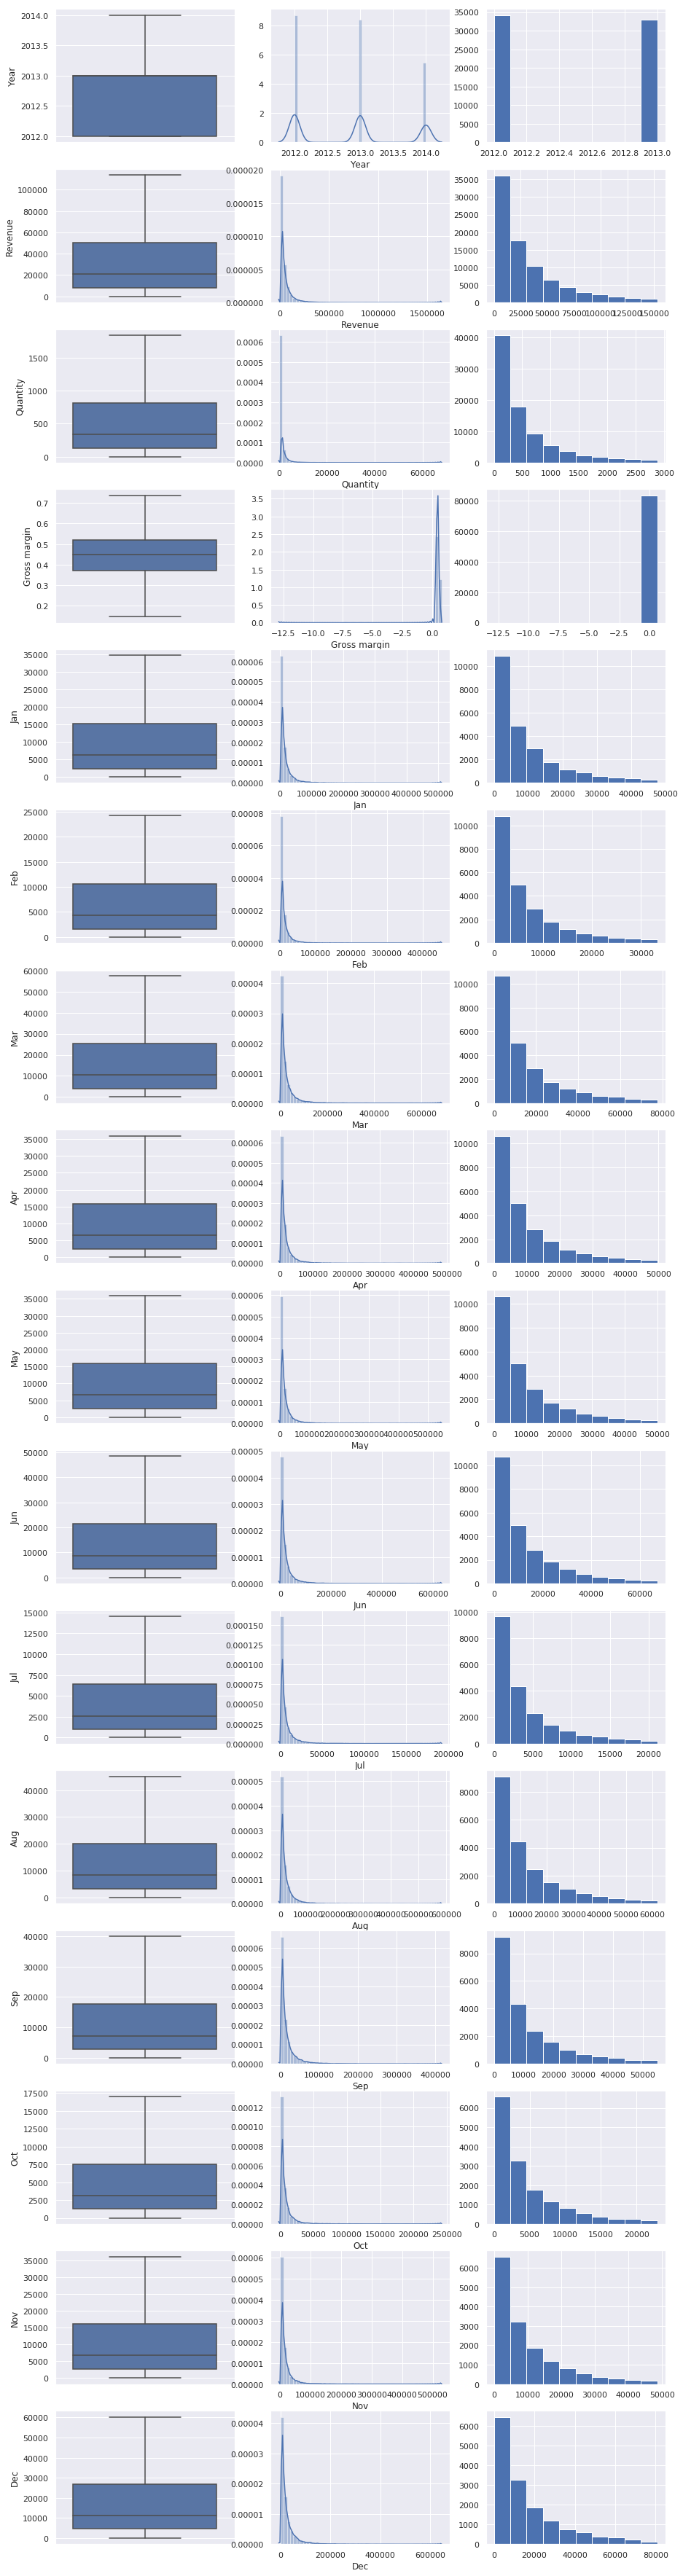

In [83]:
# Get the list of numeric columns from raw dataframe
# need this: from pandas.api.types import is_numeric_dtype
num_cols = [cols for cols in df.columns if is_numeric_dtype(df[cols])]

# Define the subplot grid
cols = 3
rows = len(num_cols)   # number of numeric columns

print("Rows : ", rows, "   cols : ", cols)

# Construct the figure and axes for the plots
fig1, f1_axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,rows*4))

# for row incrementing
r = 0

# For each numeric column in the list
for col_name in num_cols:
    # Create a copy of the column values without nulls or NA
    no_null_col = df[col_name].dropna()
    # Calculate the 95 percentile of the values
    q95, q5 = np.percentile(no_null_col, [95, 5])
    
    # Plot the graphs
    sns.boxplot(x=no_null_col, showfliers=False, orient="v", ax = f1_axes[r,0])
    sns.distplot(no_null_col, ax=f1_axes[r,1])
    no_null_col[no_null_col <q95].hist(ax=f1_axes[r,2])   #histogram of all values below 95 percentile

    r += 1   #increment row count within for loop


# Explore the full Data Quality Dataframe using pivittable.js

In Azure Notebooks, the pivottablejs package needs to be installed using !pip

In [84]:
#pivot_ui(data_qlt_df)

# Refernces

1. Sample data file obtained from IBM Analytics Community  
https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/
2. Dynamically building a dataframe  
https://stackoverflow.com/questions/10715965/add-one-row-to-pandas-dataframe  (check the answer by FooBar)    
3. Understanding the Transform Function in Pandas  
https://pbpython.com/pandas_transform.html  
4. Using The Pandas Category Data Type  
https://pbpython.com/pandas_dtypes_cat.html  
5. Using pandas with Large Data Sets  
https://www.dataquest.io/blog/pandas-big-data/
6. Reducing DataFrame memory size by ~65%   
https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65
7. Pandas Dataframe: Plot Examples with Matplotlib and Pyplot  
http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot  

# Notes

1. Pre-calculating values and adding columns to dataframe  
It may not be good strategy to pre-calulcate the total and add them as new columns as this takes up memory
Since the Data Quality Dataframe is a very small dataset this is not an issue.
For larger datasets it is best to subset the data required and do the calculations in a new dataframe which can be only for the specific use and can be assigned None once used.  
![image.png](CalculationsLate.JPG)  
<br>

2. Mutpliple agg functions in groupby() function  
'''  
    data_qlt_df.groupby('data_type').agg({'dtype_count':max, 'dtype_memory': sum, 'dtype_%_total_mem': max})  
'''
![image.png](groupbyagg.JPG)
